In [10]:
# Cargue de Librerías básicas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar tensorflow
import tensorflow as tf
print("TF version   : ", tf.__version__)

# Necesitaremos GPU
print("GPU available: ", tf.config.list_physical_devices('GPU'))

# keras version is 2.11.0
import keras
print("Keras version   : ", keras.__version__)



TF version   :  2.15.0
GPU available:  []
Keras version   :  2.15.0


In [11]:
#--------------------------------------------#
#       debido a que estoy usando COLAB      #
#--------------------------------------------#

from google.colab import drive
drive.mount('/content/drive') #/content/drive/MyDrive/pec2/data/xl.pickle
print("GPU available: ", tf.config.list_physical_devices('GPU'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
GPU available:  []


In [12]:
import pandas as pd

home =  '/content/drive/MyDrive/TFM/'

file_path = home + "2017_2023DSTrabajo.xlsx"

dsXls = pd.read_excel(file_path)
dsXls.head(5)
dsXls.info()

####################################
# LIMPIEZA DE DATOS
####################################
#1. validar duplicados
dsXls.nunique()

#2. validar nulos, rellenar valores faltantes con la mediana
#dsXls.isnull().sum()
dsXls['Dist'].fillna(dsXls['Dist'].median(), inplace=True)
dsXls['Attendance'].fillna(dsXls['Attendance'].median(), inplace=True)
dsXls.isnull().sum()


####################################
# ESTADISTICAS
####################################
#dsXls.describe().T
dsXls.iloc[:,1:].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4092 non-null   datetime64[ns]
 1   Round       4092 non-null   object        
 2   Day         4092 non-null   object        
 3   Venue       4092 non-null   object        
 4   Result      4092 non-null   object        
 5   GF          4092 non-null   float64       
 6   GA          4092 non-null   float64       
 7   Opponent    4092 non-null   object        
 8   xG          4092 non-null   float64       
 9   xGA         4092 non-null   float64       
 10  Poss        4092 non-null   float64       
 11  Attendance  3212 non-null   float64       
 12  Season      4092 non-null   int64         
 13  Team        4092 non-null   object        
 14  Sh          4092 non-null   float64       
 15  SoT         4092 non-null   float64       
 16  Dist        4089 non-nul

,GF,GA,xG,xGA,Poss,Attendance,Season,Sh,SoT,Dist,SCA,KP,PPA,CrsPA
count,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000
mean,1.377810,1.377810,1.346163,1.346163,50.001222,36912.650049,2019.214076,12.317693,4.102884,17.675318,21.840176,9.215054,7.901760,1.869501
std,1.277631,1.277631,0.796551,0.796551,12.726702,15301.262664,1.566615,5.427259,2.437269,3.038064,9.897661,4.401972,4.553291,1.613642
min,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,2017.000000,0.000000,0.000000,5.300000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.700000,0.700000,41.000000,29296.000000,2018.000000,8.000000,2.000000,15.700000,14.000000,6.000000,5.000000,1.000000
50%,1.000000,1.000000,1.200000,1.200000,50.000000,32092.500000,2019.000000,12.000000,4.000000,17.600000,21.000000,9.000000,7.000000,2.000000
75%,2.000000,2.000000,1.800000,1.800000,59.000000,51237.000000,2021.000000,16.000000,6.000000,19.500000,28.000000,12.000000,10.000000,3.000000
max,9.000000,9.000000,5.900000,5.900000,82.000000,83222.000000,2022.000000,36.000000,15.000000,35.000000,66.000000,34.000000,33.000000,12.000000


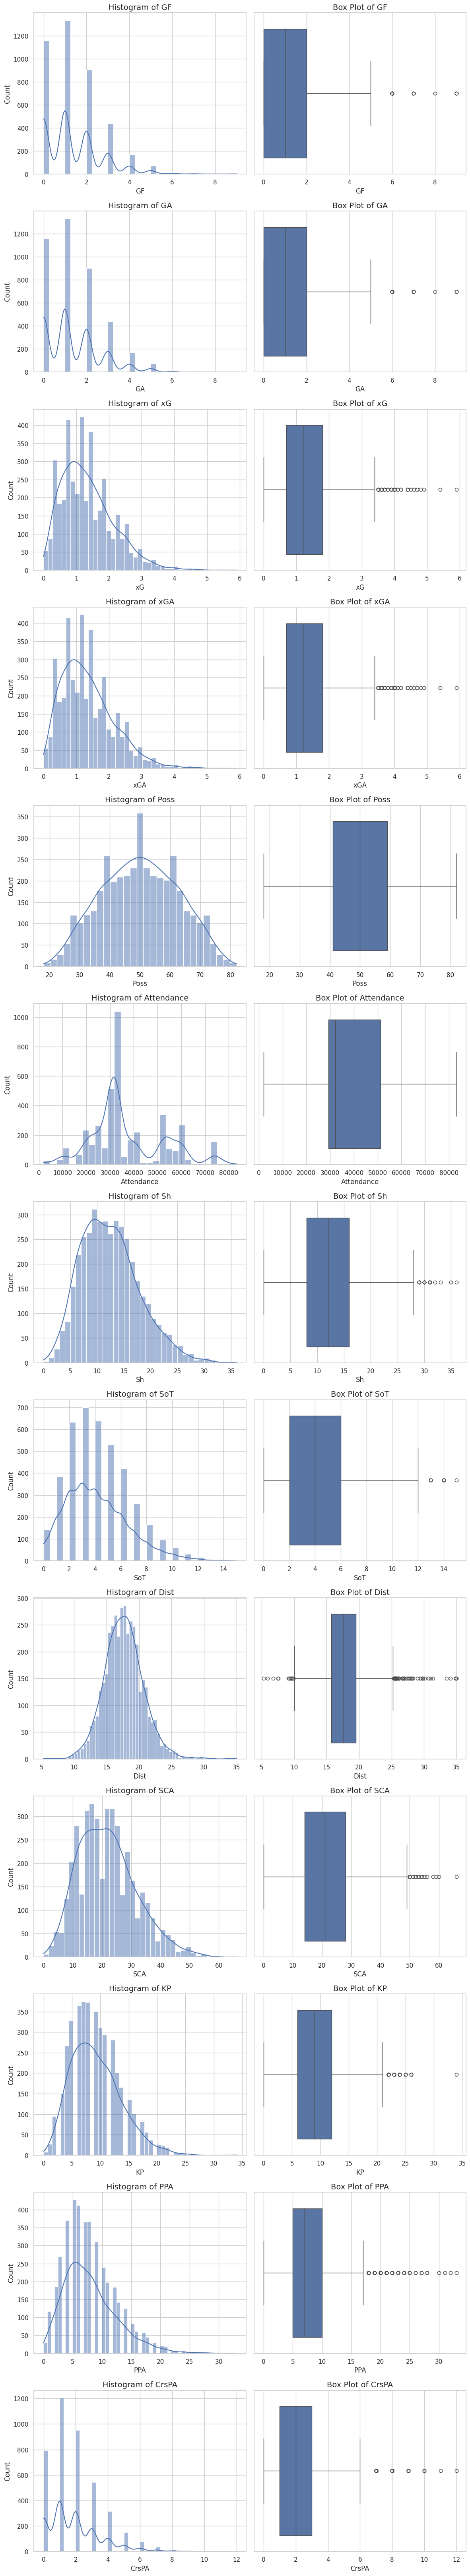

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de los estilos de los gráficos
sns.set(style="whitegrid")

# Lista de columnas numéricas para visualizar
numeric_columns = ['GF', 'GA', 'xG', 'xGA', 'Poss', 'Attendance', 'Sh', 'SoT', 'Dist', 'SCA', 'KP', 'PPA', 'CrsPA']

# Creación de histogramas y diagramas de caja para cada variable numérica
fig, axes = plt.subplots(len(numeric_columns), 2, figsize=(12, 5 * len(numeric_columns)))
for i, col in enumerate(numeric_columns):
    sns.histplot(dsXls[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}', fontsize=14)
    sns.boxplot(x=dsXls[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {col}', fontsize=14)

plt.tight_layout()
plt.show()

                GF           GA           xG          xGA         Poss  \
count  4092.000000  4092.000000  4092.000000  4092.000000  4092.000000   
mean      1.377810     1.377810     1.346163     1.346163    50.001222   
std       1.277631     1.277631     0.796551     0.796551    12.726702   
min       0.000000     0.000000     0.000000     0.000000    18.000000   
25%       0.000000     0.000000     0.700000     0.700000    41.000000   
50%       1.000000     1.000000     1.200000     1.200000    50.000000   
75%       2.000000     2.000000     1.800000     1.800000    59.000000   
max       9.000000     9.000000     5.900000     5.900000    82.000000   

         Attendance       Season           Sh          SoT         Dist  \
count   4092.000000  4092.000000  4092.000000  4092.000000  4092.000000   
mean   36912.650049  2019.214076    12.317693     4.102884    17.675318   
std    15301.262664     1.566615     5.427259     2.437269     3.038064   
min     2000.000000  2017.000000 

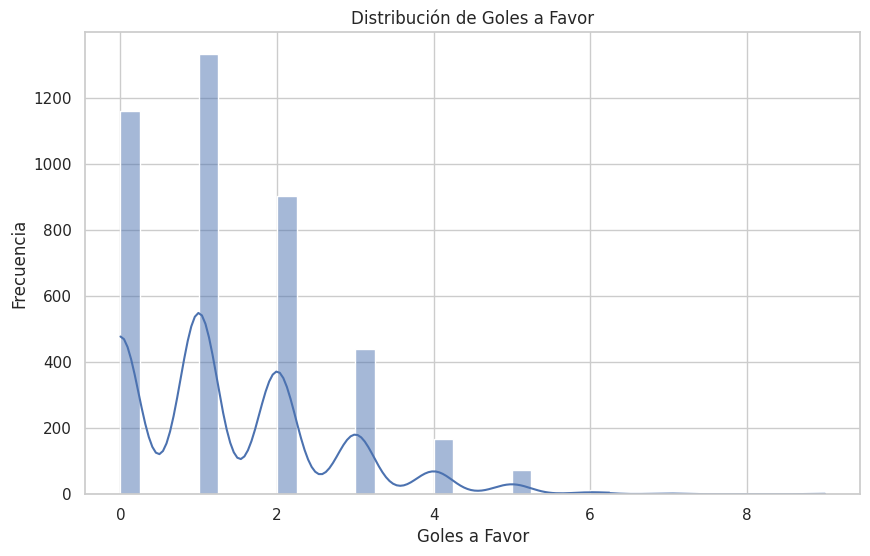

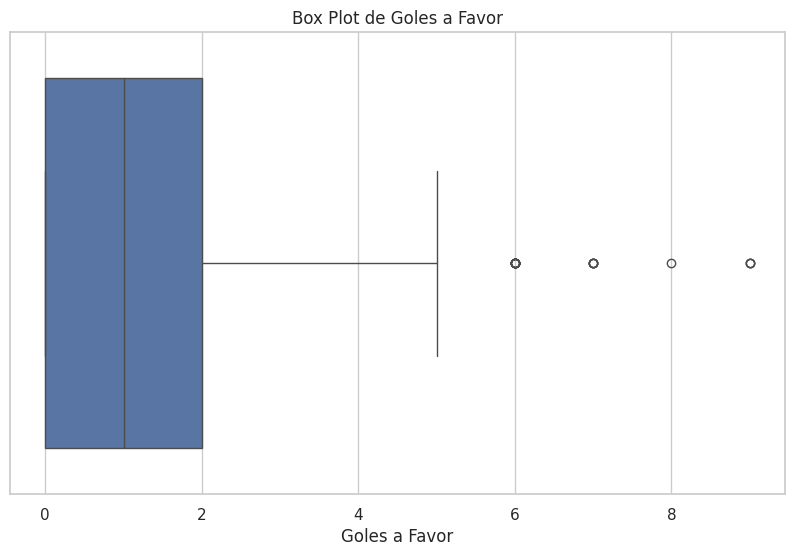

In [14]:
#analisis de goles a favor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'data' es tu DataFrame
# Estadísticas descriptivas
######dsXlsNumeric = dsXls.loc[:, ['GF', 'GA', 'xG', 'xGA', 'Poss', 'Attendance', 'Sh', 'SoT', 'Dist', 'SCA', 'KP', 'PPA', 'CrsPA']]
print(dsXlsNumeric.describe())
print(dsXlsNumeric.skew())  # Asimetría
print(dsXlsNumeric.kurt())  # Curtosis

# Histograma para la variable 'GF' (Goles a favor)
plt.figure(figsize=(10, 6))
sns.histplot(dsXlsNumeric['GF'], kde=True)
plt.title('Distribución de Goles a Favor')
plt.xlabel('Goles a Favor')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de caja para 'GF'
plt.figure(figsize=(10, 6))
sns.boxplot(x=dsXlsNumeric['GF'])
plt.title('Box Plot de Goles a Favor')
plt.xlabel('Goles a Favor')
plt.show()


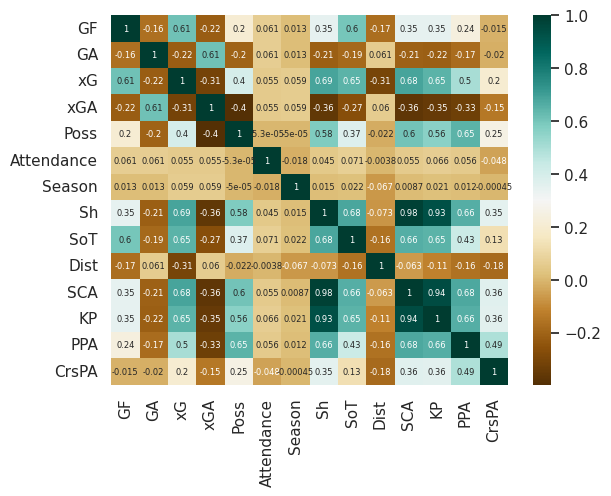

<Figure size 1900x900 with 0 Axes>

In [15]:
#CORRELACIÓN ENTRE VARIABLES
dsXlsNumeric = dsXls[['GF','GA','xG','xGA','Poss','Attendance','Season','Sh','SoT','Dist','SCA','KP','PPA','CrsPA']]
c= dsXlsNumeric.corr()

sns.heatmap(c,cmap="BrBG", annot=True, annot_kws={"size": 6})

plt.figure(figsize=(19, 9))

plt.rcParams["font.size"] = "2"